## Annual anthrax Prediction in Ethiopia

#### Project overview

##### This is a Deep-learning time series forecasting project from end-to-end, from defining the problem to training a final model and making predictions. This project is not exhaustive, but shows how you can get good results quickly by working through a time series forecasting problem systematically. The steps of this project that

#### we will work through are as follows:

##### 1. Import the required libraries and read the dataset
##### 2. Perform descriptive analysis
##### 3. Data pre-processing
     *Setting date as Index
     *Setting frequency as month
##### 4. Exploratory Data Analysis (EDA) -
#####       4.1. Data Visualization
##### 5. Set the training format
#####       5.1. Perform train-test split
##### 6. Modelling
#####       6.1. Define learning rate, number of epochs, and optimizer.
#####       6.2. Build a sequential model with LSTM layer and dense layers
##### 6.3. Fit and train the
      Make predictions on the test data
      7.1. Plot the results

-Problem framing
* The problem is to predict annual anthrax outbreaks in Ethiopia. The dataset provides the annual anthrax outbreak in Ethiopia from 2014 to 2018, or 5 years of data. The values in data indicates the total number of cases reported during outbreaks in all adminstrative region of Ethiopia, and there are 79 observations. The dataset is credited to Ministry of Livestock and Fisheries of Ethiopia, 2020. Below is a sample of the first few rows of the dataset.

-Goal of the Project
* To build disease progression model and to forecast the annual new cases of *Bacillus anthracis* in Livestocks by using Deep learning time series models. 

In [1]:
import os,sys
module_path = os.path.abspath(os.path.join("/home/miki/Desktop/Deployment/bacillus-anthracis/src"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from feat import *

In [3]:
DATAPATH = "/home/miki/Desktop/Deployment/bacillus-anthracis/data/raw/time.csv"
df = data_load(DATAPATH)

In [4]:
df

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   case    60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [6]:
summary= summary_statistics(df['case'])

In [7]:
summary
## slight deviation of the data from the mean indicated and hence not normally distributed 
## median less than the mean indicates the skeweness of the data toward right
## the minimum of the case is 0 and the maximum number of ifection reported is 210
## the difference between the 75% IQR and the maximum case indicates that there are a potential 
## outliers in data

,Mean,Standard Deviation,Median,Variance,Minimum,Maximum
Variable,,,,,,
case,117.866667,108.738443,82.5,11824.048889,3,442


In [8]:
df = check_index(df)

The duplications are found


In [9]:
df

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


In [10]:
df.set_index('date',drop=True, inplace=True)
df.index.freq = 'M'

In [11]:
df 

,case
date,
2014-01-31,132
2014-02-28,175
2014-03-31,240
2014-04-30,314
2014-05-31,299
2014-06-30,156
2014-07-31,253
2014-08-31,119
2014-09-30,188


In [12]:
from visualize import *

In [14]:
from visualize import timesplots

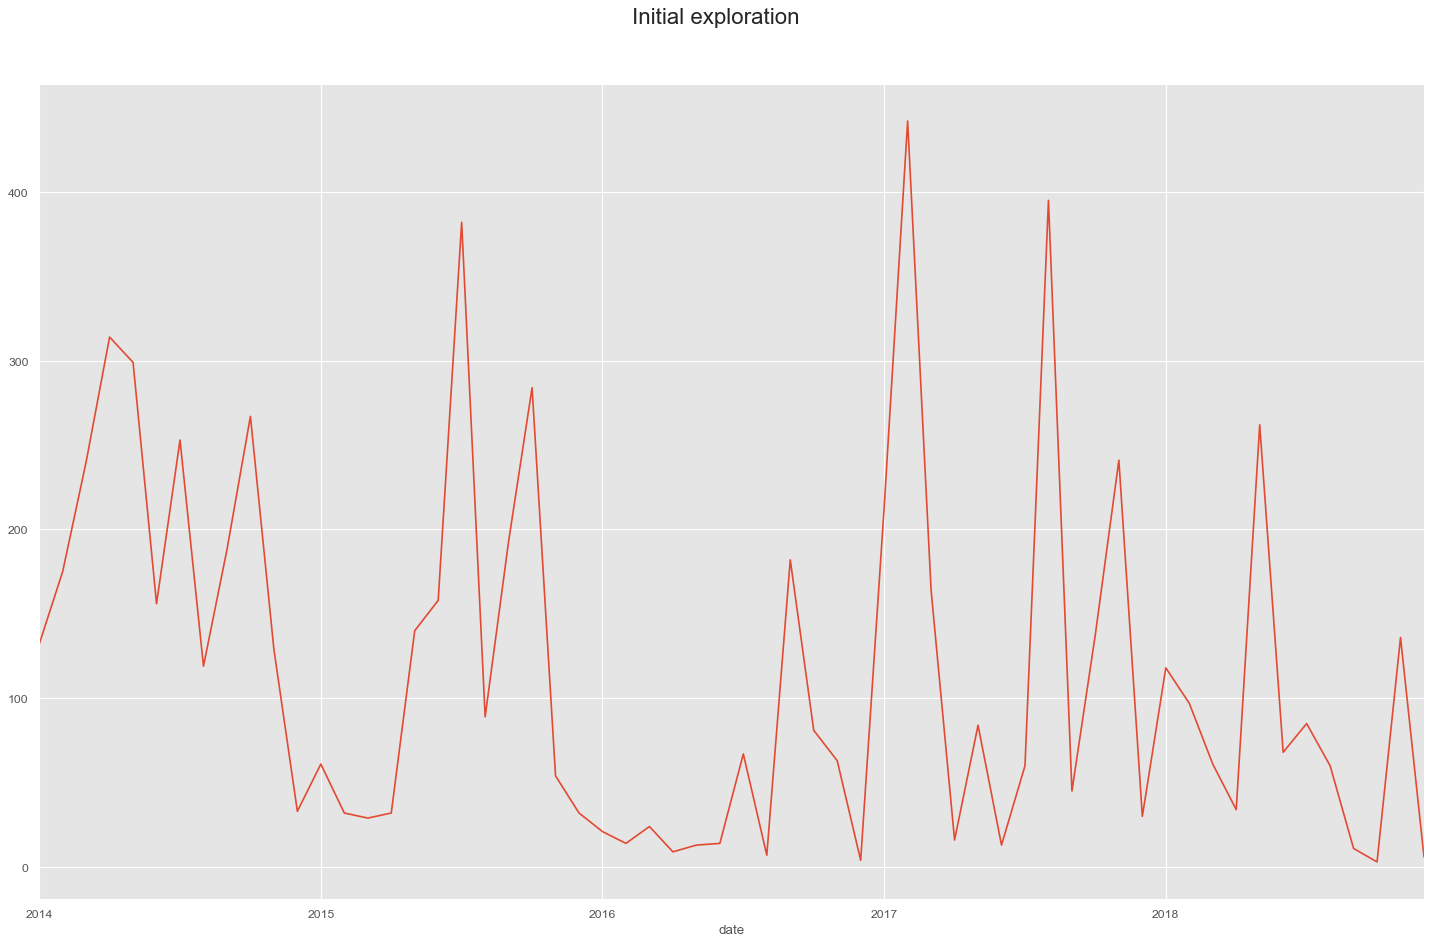

In [15]:
%matplotlib inline
plots = timesplots(df['case'], "Initial exploration")

In [16]:
df['case'] = data_normalize(df['case'])

In [19]:
create_trtst(data=df)